<a href="https://colab.research.google.com/github/ashish244co/FastAiDeepLearning/blob/master/FastAILesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai

In [2]:
!nvidia-smi

Mon Apr 27 01:00:40 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
from fastai.metrics import *

In [5]:
help(URLs)

Help on class URLs in module fastai.datasets:

class URLs(builtins.object)
 |  Global constants for dataset and model URLs.
 |  
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  ADULT_SAMPLE = 'http://files.fast.ai/data/examples/adult_sample'
 |  
 |  AG_NEWS = 'https://s3.amazonaws.com/fast-ai-nlp/ag_news_csv'
 |  
 |  AMAZON_REVIEWS = 'https://s3.amazonaws.com/fast-ai-nlp/amazon_review_f...
 |  
 |  AMAZON_REVIEWS_POLARITY = 'https://s3.amazonaws.com/fast-ai-nlp/amazon...
 |  
 |  BIWI_HEAD_POSE = 'https://s3.amazonaws.com/fast-ai-imagelocal/biwi_hea...
 |  
 |  BIWI_SAMPLE = 'http://files.fast.ai/data/examples/biwi_sample'
 |  
 |  CALTECH_101 = 'https://s3.amazonaws.com/fast-ai-imageclas/caltech_101'
 |  
 |  CAMVI

In [6]:
cifar = untar_data(URLs.CIFAR_100)
cifar_tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [7]:
cifar.ls()

[PosixPath('/root/.fastai/data/cifar100/train'),
 PosixPath('/root/.fastai/data/cifar100/test')]

In [0]:
data = ImageDataBunch.from_folder(cifar,train='train',valid='test',ds_tfms=cifar_tfms,)

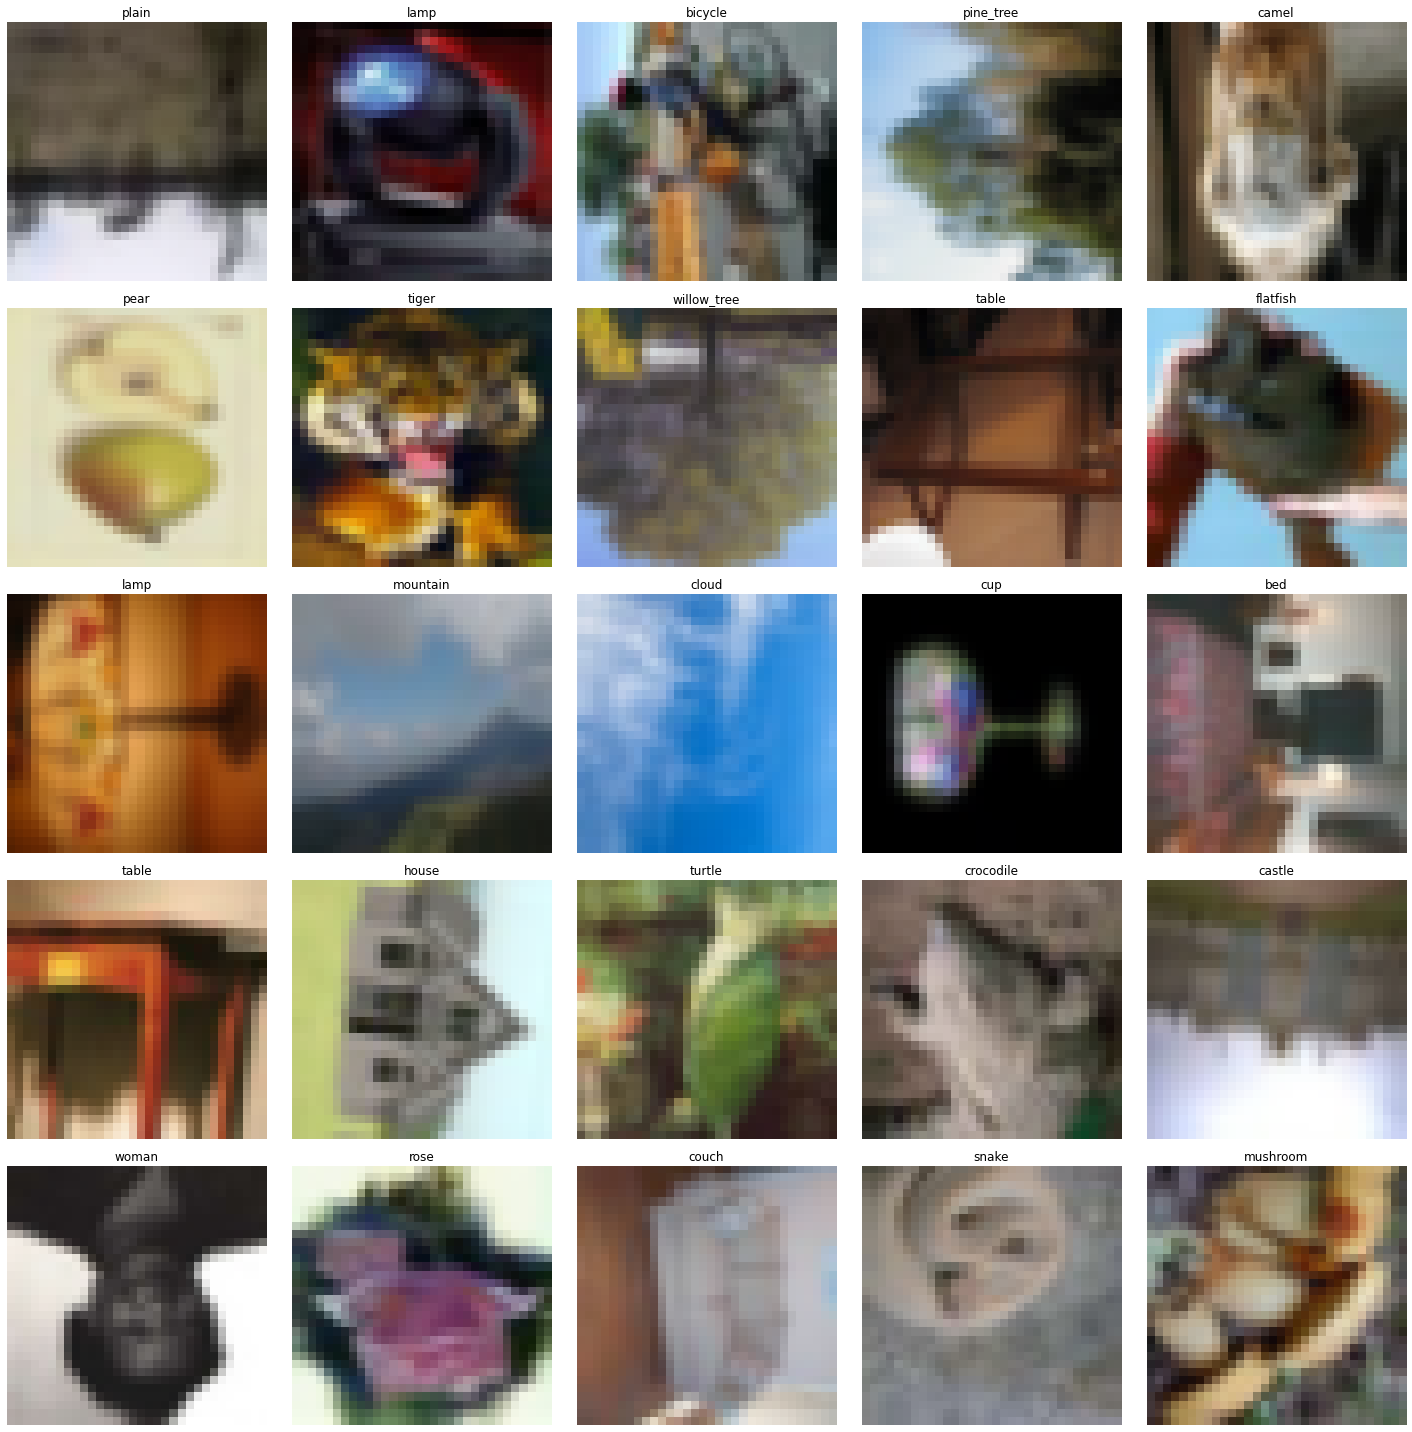

In [9]:
data.show_batch()

In [10]:
data.classes

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [12]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [13]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,3.916515,3.473390,0.790200,01:20
1,3.156754,2.850123,0.710300,01:19
2,2.800067,2.521736,0.649900,01:18
3,2.600557,2.383852,0.622800,01:18
4,2.501674,2.357892,0.619300,01:19


In [0]:
learn.unfreeze()

In [15]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


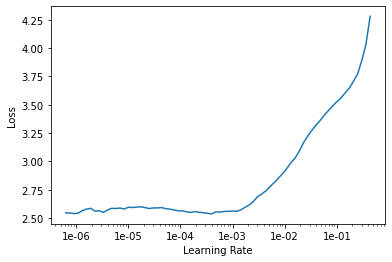

In [16]:
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(5,slice(1e-04,1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,2.390090,2.211183,0.586100,01:28
1,2.232990,2.081950,0.565900,01:27
2,1.972312,1.907166,0.521000,01:28
3,1.737602,1.764653,0.475600,01:29
4,1.556224,1.684888,0.463000,01:28


In [19]:
interp = ClassificationInterpretation.from_learner(learn)

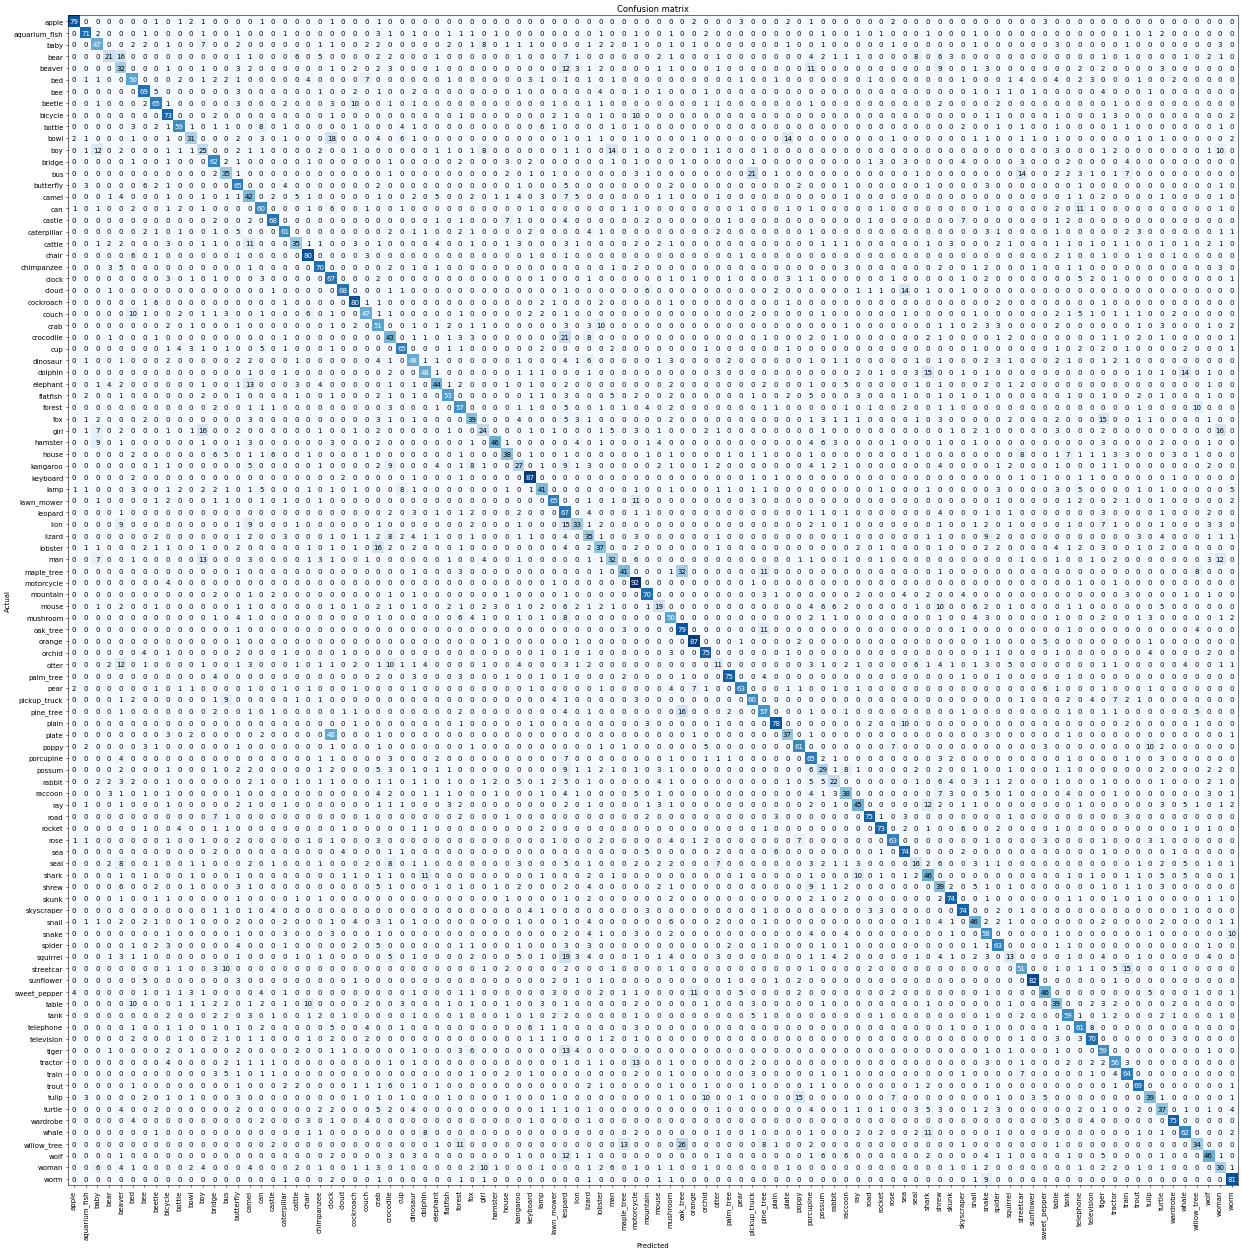

In [21]:
interp.plot_confusion_matrix(figsize=(25,25),dpi=50)

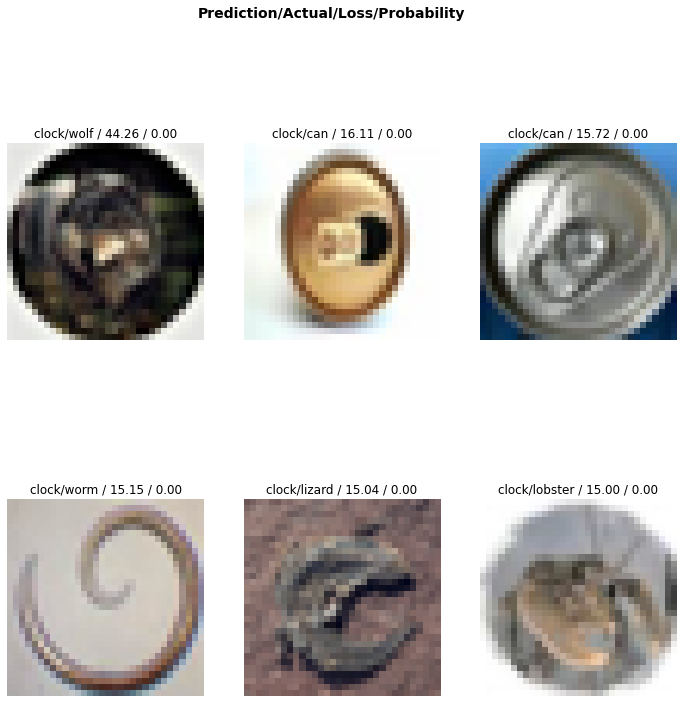

In [22]:
interp.plot_top_losses(k=6)

In [0]:
learn.save('stage1')

(Category bowl,
 tensor(10),
 tensor([9.6180e-03, 2.1388e-03, 4.6180e-03, 2.6096e-03, 3.4804e-04, 2.8691e-02,
         6.0594e-05, 5.0812e-04, 9.3075e-04, 1.8061e-03, 2.0635e-01, 8.3377e-04,
         1.4263e-03, 1.6807e-04, 9.6123e-05, 4.1056e-04, 3.4315e-02, 4.4122e-04,
         1.6540e-03, 6.7842e-04, 1.1380e-03, 3.3286e-04, 2.3300e-02, 1.8853e-02,
         6.1504e-04, 3.0401e-02, 6.4106e-04, 6.4522e-04, 5.9763e-02, 1.4005e-04,
         1.0312e-03, 2.6325e-03, 1.5660e-02, 5.8924e-03, 1.0696e-03, 7.7720e-04,
         1.7439e-02, 8.2146e-04, 5.3888e-04, 1.2362e-03, 1.5620e-02, 2.4996e-04,
         4.0923e-04, 3.1746e-04, 8.3966e-04, 1.1086e-03, 8.1496e-04, 1.2017e-03,
         1.5318e-04, 1.9656e-03, 6.5803e-03, 1.1913e-02, 6.3268e-04, 6.3293e-04,
         1.2294e-03, 2.5040e-03, 2.1789e-03, 1.2093e-02, 1.9947e-04, 1.3543e-03,
         1.8518e-02, 8.7469e-02, 8.2129e-04, 1.2201e-02, 1.3552e-03, 7.7158e-02,
         5.9681e-04, 8.4081e-02, 5.2107e-03, 2.8767e-03, 6.1840e-04, 1.8383e-02,

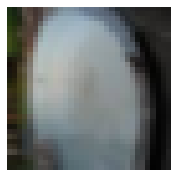

In [24]:
img = learn.data.train_ds[100][0]
img.show()
learn.predict(img)

In [25]:
print(learn.data.train_ds[100][1])

bowl
